# FlowChronicle : Experiment

This jupyter notebook present the results of Section 7 of the paper. We used here the same generated dataset as the one used in the paper, but you are free to use you own generated by our_train_and_generate.py

If you want to recover the actual results that were put in the paper they are in the results directory

The first few cells will be cell to load environment. Make sure to execute this notebook inside the docker

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
from programs.metrics import compute_WD, compute_PCD, compute_JSD, compute_DKC, compute_density_coverage, compute_CMD, compute_authenticity, compare_acf_timerange

## Loading the data

In [5]:
path = "data/"

In [6]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
eva = pd.read_csv(path+"CIDDS_xp2_evaluate.csv")
test["Date first seen"] = pd.to_datetime(test["Date first seen"])-pd.to_timedelta(7*3600*24,unit="s")
eva["Date first seen"] = pd.to_datetime(eva["Date first seen"])+pd.to_timedelta(14*3600*24,unit="s")

In [7]:
#netshare = pd.read_csv(path+xp+"/netshare_syn.csv")
ewgangp = pd.read_csv(path+"ewgan-gp_syn.csv")
ctgan = pd.read_csv(path+"ctgan_syn.csv")
tvae = pd.read_csv(path+"tvae_syn.csv")
transformer = pd.read_csv(path+"transformer_syn.csv")
netshare = pd.read_csv(path+"netshare_syn.csv")
bn_indep = pd.read_csv(path+"BN_baseline_window0_syn.csv").dropna()
bn_timdep = pd.read_csv(path+"BN_baseline_window5_syn.csv")
our = pd.read_csv(path+"our_syn.csv")

datasets = [train, test, bn_indep, bn_timdep, tvae, ctgan, ewgangp, netshare, transformer, our, eva]

In [8]:
continuous = ['In Byte', 'Out Byte', 'In Packet', 'Out Packet', 'Duration']
discrete = ['Proto', 'Src IP Addr', 'Dst IP Addr', 'Dst Pt', 'Flags']

models = ['Test', 'BN_indep', 'BN_timedep_5step', 'TVAE', 'CTGAN', 'E-WGAN-GP', 'NetShare', 'Transformer', 'Our']

# Independant Evaluation

This part refers to the subsection 7.3 of the paper

In [9]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_numeric(pd.to_datetime(datasets[i]['Date first seen']))
    datasets[i][continuous] = datasets[i][continuous].astype(float)
    datasets[i]["Proto"] = datasets[i]["Proto"].str.strip()
    datasets[i] = datasets[i][train.columns]

In [9]:
n = 10000 #as said in the paper the experiment was done 20 times on 10000 flows subsample
n_test = 20

metrics = ['JSD', 'EMD', 'PCD', 'CMD', 'Density', 'Coverage', 'Novelty', 'DKC']

jsd = np.ones((n_test, len(models)))
emd = np.ones((n_test, len(models)))
cmd= np.ones(jsd.shape)
pcd = np.ones(jsd.shape)
density = np.ones(jsd.shape)
coverage = np.ones(jsd.shape)
authenticity = np.ones(jsd.shape)
dkc = np.ones(jsd.shape)

The following cell compute the evaluation 20 times for each metric, this step can be long (approximately 1 hour), if you want to find the actual file that we used please skip the following cell and uncomment and execute the cell that comes just after

In [10]:
real = datasets.pop(0)
eval = datasets.pop(-1)
for i in range(n_test):
    tr = real.sample(n)
    eva = eval.sample(n)
    for j, m in enumerate(datasets):
        m = m.sample(n)
        jsd[i,j] = compute_JSD(tr.loc[:,discrete], m.loc[:,discrete])
        emd[i,j] = compute_WD(tr.loc[:,continuous], m.loc[:,continuous])
        pcd[i,j] = compute_PCD(tr.loc[:,continuous], m.loc[:,continuous])
        cmd[i,j] = compute_CMD(tr.loc[:,discrete], m.loc[:,discrete])
        density[i,j], coverage[i,j] = compute_density_coverage(tr, m)
        authenticity[i, j] = compute_authenticity(tr,eva, m)
        dkc[i, j] = compute_DKC(m)
        print(i, models[j])

Num real: 10000 Num fake: 10000
0 Test
Num real: 10000 Num fake: 10000
0 BN_indep
Num real: 10000 Num fake: 10000
0 BN_timedep_5step
Num real: 10000 Num fake: 10000
0 TVAE
Num real: 10000 Num fake: 10000
0 CTGAN
Num real: 10000 Num fake: 10000
0 E-WGAN-GP
Num real: 10000 Num fake: 10000
0 NetShare
Num real: 10000 Num fake: 10000
0 Transformer
Num real: 10000 Num fake: 10000
0 Our
Num real: 10000 Num fake: 10000
1 Test
Num real: 10000 Num fake: 10000
1 BN_indep
Num real: 10000 Num fake: 10000
1 BN_timedep_5step
Num real: 10000 Num fake: 10000
1 TVAE
Num real: 10000 Num fake: 10000
1 CTGAN
Num real: 10000 Num fake: 10000
1 E-WGAN-GP
Num real: 10000 Num fake: 10000
1 NetShare


/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Num real: 10000 Num fake: 10000
1 Transformer
Num real: 10000 Num fake: 10000
1 Our
Num real: 10000 Num fake: 10000
2 Test
Num real: 10000 Num fake: 10000
2 BN_indep
Num real: 10000 Num fake: 10000
2 BN_timedep_5step
Num real: 10000 Num fake: 10000
2 TVAE
Num real: 10000 Num fake: 10000
2 CTGAN
Num real: 10000 Num fake: 10000
2 E-WGAN-GP
Num real: 10000 Num fake: 10000
2 NetShare
Num real: 10000 Num fake: 10000
2 Transformer
Num real: 10000 Num fake: 10000
2 Our
Num real: 10000 Num fake: 10000
3 Test
Num real: 10000 Num fake: 10000
3 BN_indep
Num real: 10000 Num fake: 10000
3 BN_timedep_5step
Num real: 10000 Num fake: 10000
3 TVAE
Num real: 10000 Num fake: 10000
3 CTGAN
Num real: 10000 Num fake: 10000
3 E-WGAN-GP
Num real: 10000 Num fake: 10000
3 NetShare
Num real: 10000 Num fake: 10000
3 Transformer
Num real: 10000 Num fake: 10000
3 Our
Num real: 10000 Num fake: 10000
4 Test
Num real: 10000 Num fake: 10000
4 BN_indep
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


4 BN_timedep_5step
Num real: 10000 Num fake: 10000
4 TVAE
Num real: 10000 Num fake: 10000
4 CTGAN
Num real: 10000 Num fake: 10000
4 E-WGAN-GP
Num real: 10000 Num fake: 10000
4 NetShare
Num real: 10000 Num fake: 10000
4 Transformer
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


4 Our
Num real: 10000 Num fake: 10000
5 Test
Num real: 10000 Num fake: 10000
5 BN_indep
Num real: 10000 Num fake: 10000
5 BN_timedep_5step
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


5 TVAE
Num real: 10000 Num fake: 10000
5 CTGAN
Num real: 10000 Num fake: 10000
5 E-WGAN-GP
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


5 NetShare
Num real: 10000 Num fake: 10000
5 Transformer
Num real: 10000 Num fake: 10000
5 Our
Num real: 10000 Num fake: 10000
6 Test
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


6 BN_indep
Num real: 10000 Num fake: 10000
6 BN_timedep_5step
Num real: 10000 Num fake: 10000
6 TVAE
Num real: 10000 Num fake: 10000
6 CTGAN
Num real: 10000 Num fake: 10000
6 E-WGAN-GP
Num real: 10000 Num fake: 10000
6 NetShare
Num real: 10000 Num fake: 10000
6 Transformer
Num real: 10000 Num fake: 10000
6 Our
Num real: 10000 Num fake: 10000
7 Test
Num real: 10000 Num fake: 10000
7 BN_indep
Num real: 10000 Num fake: 10000
7 BN_timedep_5step
Num real: 10000 Num fake: 10000
7 TVAE
Num real: 10000 Num fake: 10000
7 CTGAN
Num real: 10000 Num fake: 10000
7 E-WGAN-GP
Num real: 10000 Num fake: 10000
7 NetShare
Num real: 10000 Num fake: 10000
7 Transformer
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


7 Our
Num real: 10000 Num fake: 10000
8 Test
Num real: 10000 Num fake: 10000
8 BN_indep
Num real: 10000 Num fake: 10000
8 BN_timedep_5step
Num real: 10000 Num fake: 10000
8 TVAE
Num real: 10000 Num fake: 10000
8 CTGAN
Num real: 10000 Num fake: 10000
8 E-WGAN-GP
Num real: 10000 Num fake: 10000
8 NetShare
Num real: 10000 Num fake: 10000
8 Transformer
Num real: 10000 Num fake: 10000
8 Our
Num real: 10000 Num fake: 10000
9 Test
Num real: 10000 Num fake: 10000
9 BN_indep
Num real: 10000 Num fake: 10000
9 BN_timedep_5step
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


9 TVAE
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


9 CTGAN
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


9 E-WGAN-GP
Num real: 10000 Num fake: 10000
9 NetShare


/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Num real: 10000 Num fake: 10000
9 Transformer
Num real: 10000 Num fake: 10000
9 Our
Num real: 10000 Num fake: 10000
10 Test
Num real: 10000 Num fake: 10000
10 BN_indep
Num real: 10000 Num fake: 10000
10 BN_timedep_5step
Num real: 10000 Num fake: 10000
10 TVAE
Num real: 10000 Num fake: 10000
10 CTGAN
Num real: 10000 Num fake: 10000
10 E-WGAN-GP
Num real: 10000 Num fake: 10000
10 NetShare
Num real: 10000 Num fake: 10000
10 Transformer
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


10 Our
Num real: 10000 Num fake: 10000
11 Test
Num real: 10000 Num fake: 10000
11 BN_indep
Num real: 10000 Num fake: 10000
11 BN_timedep_5step
Num real: 10000 Num fake: 10000
11 TVAE
Num real: 10000 Num fake: 10000
11 CTGAN
Num real: 10000 Num fake: 10000
11 E-WGAN-GP
Num real: 10000 Num fake: 10000
11 NetShare
Num real: 10000 Num fake: 10000
11 Transformer
Num real: 10000 Num fake: 10000
11 Our
Num real: 10000 Num fake: 10000
12 Test
Num real: 10000 Num fake: 10000
12 BN_indep
Num real: 10000 Num fake: 10000
12 BN_timedep_5step
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


12 TVAE
Num real: 10000 Num fake: 10000
12 CTGAN
Num real: 10000 Num fake: 10000
12 E-WGAN-GP
Num real: 10000 Num fake: 10000
12 NetShare
Num real: 10000 Num fake: 10000
12 Transformer
Num real: 10000 Num fake: 10000
12 Our
Num real: 10000 Num fake: 10000
13 Test
Num real: 10000 Num fake: 10000
13 BN_indep
Num real: 10000 Num fake: 10000
13 BN_timedep_5step
Num real: 10000 Num fake: 10000
13 TVAE
Num real: 10000 Num fake: 10000
13 CTGAN
Num real: 10000 Num fake: 10000
13 E-WGAN-GP
Num real: 10000 Num fake: 10000
13 NetShare
Num real: 10000 Num fake: 10000
13 Transformer
Num real: 10000 Num fake: 10000
13 Our
Num real: 10000 Num fake: 10000
14 Test
Num real: 10000 Num fake: 10000
14 BN_indep
Num real: 10000 Num fake: 10000
14 BN_timedep_5step
Num real: 10000 Num fake: 10000
14 TVAE
Num real: 10000 Num fake: 10000
14 CTGAN
Num real: 10000 Num fake: 10000
14 E-WGAN-GP
Num real: 10000 Num fake: 10000
14 NetShare


/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Num real: 10000 Num fake: 10000
14 Transformer
Num real: 10000 Num fake: 10000
14 Our
Num real: 10000 Num fake: 10000
15 Test
Num real: 10000 Num fake: 10000
15 BN_indep
Num real: 10000 Num fake: 10000
15 BN_timedep_5step
Num real: 10000 Num fake: 10000
15 TVAE
Num real: 10000 Num fake: 10000
15 CTGAN
Num real: 10000 Num fake: 10000
15 E-WGAN-GP
Num real: 10000 Num fake: 10000
15 NetShare
Num real: 10000 Num fake: 10000
15 Transformer
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


15 Our
Num real: 10000 Num fake: 10000
16 Test
Num real: 10000 Num fake: 10000
16 BN_indep
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


16 BN_timedep_5step
Num real: 10000 Num fake: 10000
16 TVAE
Num real: 10000 Num fake: 10000
16 CTGAN
Num real: 10000 Num fake: 10000


/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


16 E-WGAN-GP
Num real: 10000 Num fake: 10000
16 NetShare
Num real: 10000 Num fake: 10000
16 Transformer
Num real: 10000 Num fake: 10000
16 Our
Num real: 10000 Num fake: 10000
17 Test
Num real: 10000 Num fake: 10000
17 BN_indep
Num real: 10000 Num fake: 10000
17 BN_timedep_5step
Num real: 10000 Num fake: 10000
17 TVAE
Num real: 10000 Num fake: 10000
17 CTGAN
Num real: 10000 Num fake: 10000
17 E-WGAN-GP
Num real: 10000 Num fake: 10000
17 NetShare
Num real: 10000 Num fake: 10000
17 Transformer
Num real: 10000 Num fake: 10000
17 Our
Num real: 10000 Num fake: 10000
18 Test
Num real: 10000 Num fake: 10000
18 BN_indep
Num real: 10000 Num fake: 10000
18 BN_timedep_5step
Num real: 10000 Num fake: 10000
18 TVAE
Num real: 10000 Num fake: 10000
18 CTGAN
Num real: 10000 Num fake: 10000
18 E-WGAN-GP
Num real: 10000 Num fake: 10000
18 NetShare
Num real: 10000 Num fake: 10000
18 Transformer
Num real: 10000 Num fake: 10000
18 Our
Num real: 10000 Num fake: 10000
19 Test
Num real: 10000 Num fake: 10000
1

/app/metrics.py:147: RuntimeWarning: invalid value encountered in scalar divide
  f1= 2*pr*rr/(pr+rr)


19 NetShare
Num real: 10000 Num fake: 10000
19 Transformer
Num real: 10000 Num fake: 10000
19 Our


In [11]:
#if you want to use our actual measurements, uncomment the following line and skip the next cell
result = pd.read_csv("results/independent_evaluation.csv", index_col=[0,1]).astype(float)

In [12]:
result = pd.DataFrame(index=[np.repeat(metrics,n_test),np.arange(len(metrics)*n_test)], columns = models)
result.loc['JSD']=jsd
result.loc["EMD"]=emd
result.loc['PCD']=pcd
result.loc["CMD"]=cmd
result.loc['Density']=density
result.loc['Coverage']=coverage
result.loc['Novelty']=authenticity
result.loc['DKC']=dkc
result = result.astype(float)

This cells will show the box plot of every model according to every metric (Not provided in the paper)

Text(0.5, 0.05, 'Lower is better, except for Density and Coverage.')

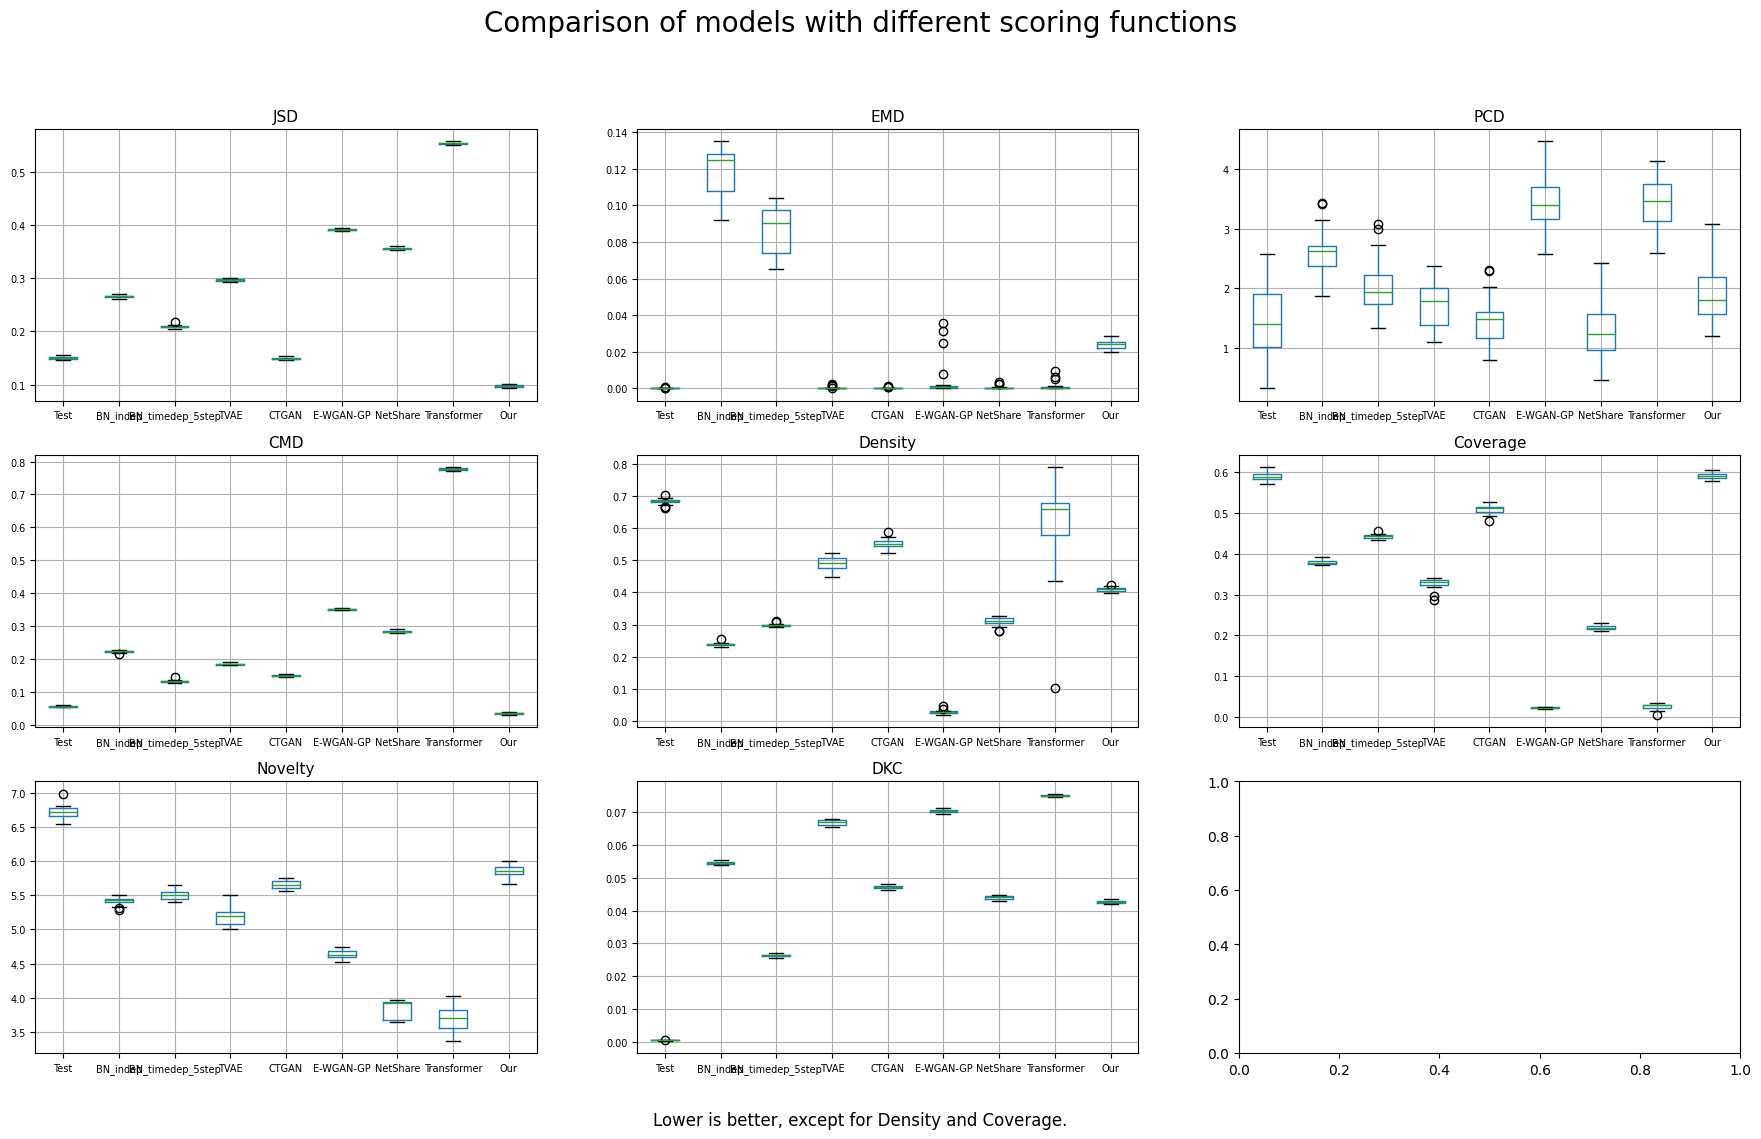

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(22,12))

for i, metric in enumerate(result.index.get_level_values(0).drop_duplicates()):
    result.loc[metric,list(result.columns)].boxplot(ax = axs[i // 3, i % 3], fontsize=7)
    axs[i // 3, i % 3].set_title(metric, fontsize = 11)

fig.suptitle('Comparison of models with different scoring functions', fontsize = 20)
fig.text(.5, .05,'Lower is better, except for Density and Coverage.', fontsize = 12, ha = 'center')

The following cell will reproduce Table 2 of the paper

In [14]:
avgs = result.groupby(level=0).mean().transpose()
avgs = avgs.rename(columns = {"Novelty":"MD"}, index = {"Test":"Reference", "BN_indep":"IndependentBN", "BN_timedep_5step":"SequenceBN", "Our":"FlowChronicle"})
avgs = avgs[["Density", "CMD", "PCD", "EMD", "JSD", "Coverage", "DKC", "MD"]]

rnks = avgs.iloc[1:,].copy()
rnks[["Density", "Coverage"]] = -rnks[["Density", "Coverage"]]
rnks["MD"] = (avgs.loc["Reference","MD"]-rnks["MD"]).abs()
rnks = rnks.rank(ascending=True, method="min")
rnks["Average Ranking"] = rnks.mean(axis=1)

avgs = avgs.round(2).astype(str)
avgs = "("+avgs+")"
rnks = rnks.astype(str)
tab = rnks+" "+avgs
tab.loc["Reference",:] = avgs.loc["Reference",:]
tab["Average Ranking"] = rnks["Average Ranking"]
tab = tab[["Density", "CMD", "PCD", "EMD", "JSD", "Coverage", "DKC", "MD", "Average Ranking"]]
tab = tab.reindex(["Reference", "IndependentBN","SequenceBN","TVAE","CTGAN","E-WGAN-GP","NetShare","Transformer","FlowChronicle"])
tab.head(20)

,Density,CMD,PCD,EMD,JSD,Coverage,DKC,MD,Average Ranking
Reference,(0.68),(0.06),(1.39),(0.0),(0.15),(0.59),(0.0),(6.72),NaN
IndependentBN,7.0 (0.24),5.0 (0.22),6.0 (2.58),8.0 (0.12),4.0 (0.27),4.0 (0.38),5.0 (0.05),4.0 (5.42),5.375
SequenceBN,6.0 (0.3),2.0 (0.13),5.0 (2.0),7.0 (0.09),3.0 (0.21),3.0 (0.44),1.0 (0.03),3.0 (5.51),3.75
TVAE,3.0 (0.49),4.0 (0.18),3.0 (1.74),2.0 (0.0),5.0 (0.3),5.0 (0.33),6.0 (0.07),5.0 (5.21),4.125
CTGAN,2.0 (0.55),3.0 (0.15),2.0 (1.46),1.0 (0.0),2.0 (0.15),2.0 (0.51),4.0 (0.05),2.0 (5.66),2.25
E-WGAN-GP,8.0 (0.03),7.0 (0.35),7.0 (3.43),5.0 (0.01),7.0 (0.39),8.0 (0.02),7.0 (0.07),6.0 (4.63),6.875
NetShare,5.0 (0.31),6.0 (0.28),1.0 (1.26),3.0 (0.0),6.0 (0.36),6.0 (0.22),3.0 (0.04),7.0 (3.85),4.625
Transformer,1.0 (0.6),8.0 (0.78),8.0 (3.43),4.0 (0.0),8.0 (0.55),7.0 (0.03),8.0 (0.08),8.0 (3.7),6.5
FlowChronicle,4.0 (0.41),1.0 (0.03),4.0 (1.88),6.0 (0.02),1.0 (0.1),1.0 (0.59),2.0 (0.04),1.0 (5.86),2.5


# Time dependancy

This part will reproduce subsection 7.4 of the paper

In [15]:
datasets = [train, test, bn_indep, bn_timdep, tvae, ctgan, ewgangp, netshare, transformer, our]

In [16]:
for i in range(len(datasets)):
    datasets[i]["Date first seen"] = pd.to_datetime(datasets[i]['Date first seen'])
    datasets[i] = datasets[i].sort_values("Date first seen")
    datasets[i][continuous] = datasets[i][continuous].astype(int)
    #datasets[i].loc[(datasets[i]["Dst IP Addr"].str.contains("_")) & (datasets[i]["Dst IP Addr"] != "EXT_SERVER"),"Dst IP Addr"] = "IP_PUB"
    datasets[i].index=datasets[i].pop("Date first seen")
    datasets[i] = datasets[i][continuous+discrete]

## Numerical features

This is the evaluation in 7.4.1 in the paper
If you are interestedin getting the result of the paper, without reproducing them, you can load our results on the next cell and skip the one after

In [17]:
ctime = pd.read_csv("results/temporal_dep_numerical_avg.csv", index_col=0)

In [18]:
crrtime_2 = np.zeros((len(models), len(continuous)))

tr = datasets[0]

for i, m in enumerate(datasets[1:]):
    for j, c in enumerate(continuous):
        crrtime_2[i,j] = compare_acf_timerange(tr[c], m[c])

ctime = pd.DataFrame(crrtime_2, columns=continuous, index=models)

The following cell will reproduce Figure 4 of the paper

In [ ]:
# Number of models and metrics
n_models = ctime.shape[0]
n_metrics = ctime.shape[1]

ind = np.arange(n_metrics) * (n_models + 2)
# Width of the bars (narrower)
width = 0.6  

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plotting each metric
for i, model in enumerate(ctime.index):
    # Calculate positions for the current metric's bars
    positions = ind + i * width
    # Plot the bars for the current metric
    ax.bar(positions, ctime.loc[model], width, label=model, capsize=5)

# Adding labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Difference of ACFs')
ax.set_title('Model Metrics')
ax.set_xticks(ind + width * (n_models - 1) / 2)
ax.set_xticklabels(ctime.columns)
ax.legend()

plt.show()

## Categorical features

#### For the moment we launch the evaluation in a side job and read the results here. This is because the evaluation in itself, with the training of multiple models

If you want to launch the evaluation yourself, please launch in a separate jobs

root:/app/programs# python3 metrics.py

WARNING : High Resource Consumption, see the Artifact Evaluation Appendix for more details

The result of this evaluation will be stored in the results directory

In [ ]:
avg= pd.read_csv("results/temporal_dep_discrete_avg.csv", index_col=0)

This cell reproduce Figure 5 of the paper

In [ ]:
# Number of models and metrics
n_models = avg.shape[0]
n_metrics = avg.shape[1]

ind = np.arange(n_metrics) * (n_models + 2)
# Width of the bars (narrower)
width = 0.6  

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plotting each metric
for i, model in enumerate(avg.index):
    # Calculate positions for the current metric's bars
    positions = ind + i * width
    # Plot the bars for the current metric
    ax.bar(positions, avg.loc[model], width, label=model, capsize=5)

# Adding labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Mean difference of score between the two LSTMs')
ax.set_title('Model Metrics')
ax.set_xticks(ind + width * (n_models - 1) / 2)
ax.set_xticklabels(avg.columns)
ax.legend()

plt.show()